# Fractal Basins of Attraction

Author: Alejandro C. Parra Garcia

In [50]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [51]:
# Center Plot
# Code from: https://moonbooks.org/Articles/How-to-center-a-matplotlib-figure-in-a-Jupyter-notebook-/
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

For equation: f(z) = z^3-1

Zeros of the equation:

z0 =  1+0j

z1 = -0.5-(sqrt(3)/2)j

z2 =  -0.5+(sqrt(3)/2)j

In [52]:

ceros_z=[]
z0 = 1+0j
z1 = -0.5-0.8660254037844386j
z2 = -0.5+0.8660254037844386j
ceros_z.append(z0) 
ceros_z.append(z1) 
ceros_z.append(z2) 

#x_coordinates = [z0.real, z1.real, z2.real]
#y_coordinates = [z0.imag, z1.imag, z2.imag]
#names= ["z0","z1","z2"]

x_coordinates = []
y_coordinates = []
names= []
for count, value in enumerate(ceros_z):
    x_coordinates.append(value.real)
    y_coordinates.append(value.imag)
    names.append("z"+str(count))

#ROOT_COLORS_BRIGHT = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
ROOT_COLORS_BRIGHT = ["#ff0000", "#0000ff", "#ffff00"]
#ROOT_COLORS = ["#440154", "#3b528b", "#21908c", "#5dc963"]
ROOT_COLORS = ["#440154", "#21908c", "#5dc963"]


In [53]:
# function: x^3-1
def f_x(x):
    return (x**3)-1

# derivative 3*x^2
def f_x_der(x):
    return 3*(x**2)


In [54]:
# function: x - f(x)/f'(x)
def newton_iteration(x):
    # Calculate the derivate
    derivate=f_x_der(x)
    
    # If derivate is 0, then error
    if(derivate == 0+0j):
        return None
    
    return x-(f_x(x)/derivate)

In [55]:
# Iterate n times or until the change is smaller than 1e-4
# each iteration apply newton_iteration() funtion
def iterations(x,n=10,e=1e-4):
    n_value=x
    for i in range(n):
        # Calculate next iteration
        n_value_1 = newton_iteration(n_value)
        
        # There was no solution
        if(n_value_1 is None):
            return None
        
        #Print Iteration and Value
        #print("Iteration " + str(i) + ": " + str(n_value_1))
        
        #Evaluate the error
        if( abs(n_value_1-n_value) < e and abs((n_value_1**3)-1) < e):
            
            return n_value_1
        
        #Update the value
        n_value = n_value_1
    
    return None

# Find closest root
def find_closest_root(x):
    distance=[]
    for count, value in enumerate(ceros_z):
        dis=abs(value-x)
        distance.append(dis)
    
    min_value = min(distance)
    min_index = distance.index(min_value)
    return min_index

We are going to plot the numbers between -1 <= real(z) <=1, and -1 <= imaginary(z) <=1

The greed is dimension_x x dimension_y

In [56]:
def generate_points(n_iteration=10, e=1e-4, dimension_x=1000, dimension_y=1000, range_x=[-1,1], range_y=[-1,1]):
    start_time = time.time()
    
    data=[]
    # Calculate the lenght of the axis
    range_xx=range_x[1]-range_x[0]
    range_yy=range_y[1]-range_y[0]
    #print(range_xx)
    #print(range_yy)
    
    # Split the range into dimension_ sections
    step_x=range_xx/dimension_x
    step_y=range_yy/dimension_y
    #print(step_x)
    #print(step_y)
    
    for x in range(dimension_x):
        start_x = round(range_x[0] + step_x*x, 15)
        #print("start_x: ",start_x)
        for y in range(dimension_y):
            start_y = round(range_y[0] + step_y*y, 15)
            #print("start_y: ",start_y)
            
            #Create the Complex Number
            complex_number=complex(start_x,start_y)
            #print("Complex number: ",complex_number)
            
            # We run Newtons method for the given complex number
            res = iterations(complex_number, n = n_iteration, e = e)
            #print("Res: ", res)
            
            converges = False
            converge_to = None
            color = None
            if(res is not None):
                # It has converge
                converges = True
                # Get index of the solution
                index_sol=find_closest_root(res)
                # Get the solution
                converge_to = ceros_z[index_sol]
                # Get the color
                color=ROOT_COLORS[index_sol]
                
                
            # Add data to the List
            data.append([complex_number,start_x,start_y, converges, converge_to, color])
            #df = pd.DataFrame(data, columns = ['complex_number', 'real_part','imaginary_part', 'converges', 'converge_to', 'color'])
            #return(df)
            #break
        #break
    # Create the pandas DataFrame
    df = pd.DataFrame(data, columns = ['complex_number', 'real_part','imaginary_part', 'converges', 'converge_to', 'color'])
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    return df

In [57]:
def plot_points(dataframe, range_x=[-1,1], range_y=[-1,1]):
    # Show extra on all sides of the plot
    extra_plot=0.1
    
    
    
    # Set dimensions of the plot
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot the points that converges
    ax.scatter(df[df.converges].real_part, df[df.converges].imaginary_part, c=df[df.converges].color)
    

    # Plot the solutions
    ax.scatter(x_coordinates, y_coordinates,s= 150, c=ROOT_COLORS_BRIGHT)
    for i, txt in enumerate(names):
        ax.annotate(txt, (x_coordinates[i], y_coordinates[i]), xytext =(x_coordinates[i]+((range_x[1]-range_x[0])/100), y_coordinates[i]), fontsize=20 )
    
    # Fix X axis
    plt.xlim( (range_x[0] - extra_plot), (range_x[1] + extra_plot) )
    # Fix Y axis
    plt.ylim( (range_y[0] - extra_plot), (range_y[1] + extra_plot) )
    # Add X label
    plt.xlabel("Real")
    # Add Y label
    plt.ylabel("Imaginary")

## Run the code

**Modify the variables to change the behavior of the resulting graph**

In [37]:
# Variables: 
iteration=10
error=1e-4
points_on_X=1000
points_on_y=1000
range_of_x=[-1,1]
range_of_y=[-1,1]

In [10]:
# Run the code
df=generate_points(n_iteration=iteration, e=error, dimension_x=points_on_X, dimension_y=points_on_y, range_x=range_of_x, range_y=range_of_y)

--- 14.266952753067017 seconds ---


**Plot the results**

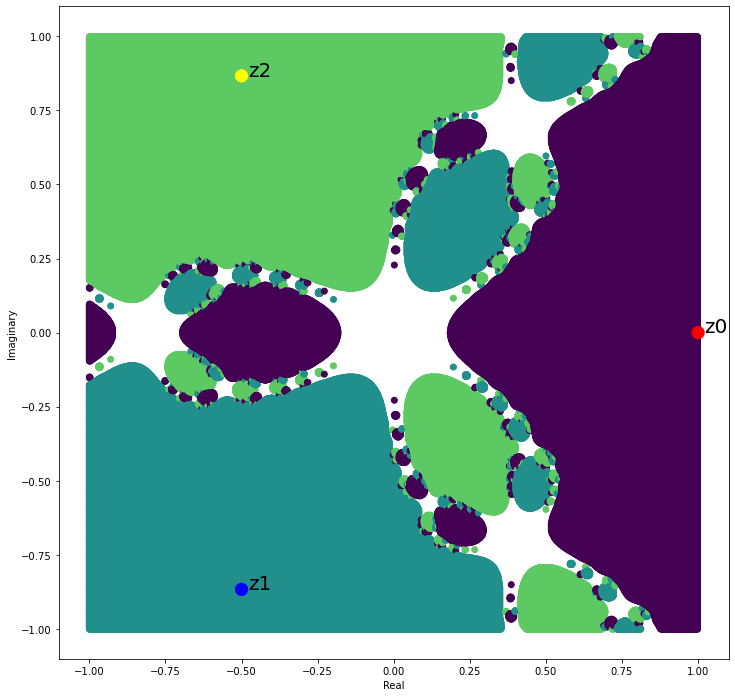

In [11]:
plot_points(df, range_x = range_of_x, range_y = range_of_y)

See the resulting values

In [12]:
print("Total Number of points evaluated: ", df.shape[0])
print("total Number of points that converge: ", df[df.converges].shape[0])
print("% of points that converge: ", df[df.converges].shape[0]/df.shape[0])

df

Total Number of points evaluated:  1000000
total Number of points that converge:  839664
% of points that converge:  0.839664


,complex_number,real_part,imaginary_part,converges,converge_to,color
0,-1.000-1.000j,-1.000,-1.000,True,-0.500000-0.866025j,#21908c
1,-1.000-0.998j,-1.000,-0.998,True,-0.500000-0.866025j,#21908c
2,-1.000-0.996j,-1.000,-0.996,True,-0.500000-0.866025j,#21908c
3,-1.000-0.994j,-1.000,-0.994,True,-0.500000-0.866025j,#21908c
4,-1.000-0.992j,-1.000,-0.992,True,-0.500000-0.866025j,#21908c
...,...,...,...,...,...,...
999995,0.998+0.990j,0.998,0.990,True,1.000000+0.000000j,#440154
999996,0.998+0.992j,0.998,0.992,True,1.000000+0.000000j,#440154
999997,0.998+0.994j,0.998,0.994,True,1.000000+0.000000j,#440154
999998,0.998+0.996j,0.998,0.996,True,1.000000+0.000000j,#440154


If we try **20 iterations** instead of 10 we get the next results:


In [13]:
# Variables: 
iteration=20
# Run the code
df=generate_points(n_iteration=iteration, e=error, dimension_x=points_on_X, dimension_y=points_on_y, range_x=range_of_x, range_y=range_of_y)

--- 15.221116542816162 seconds ---


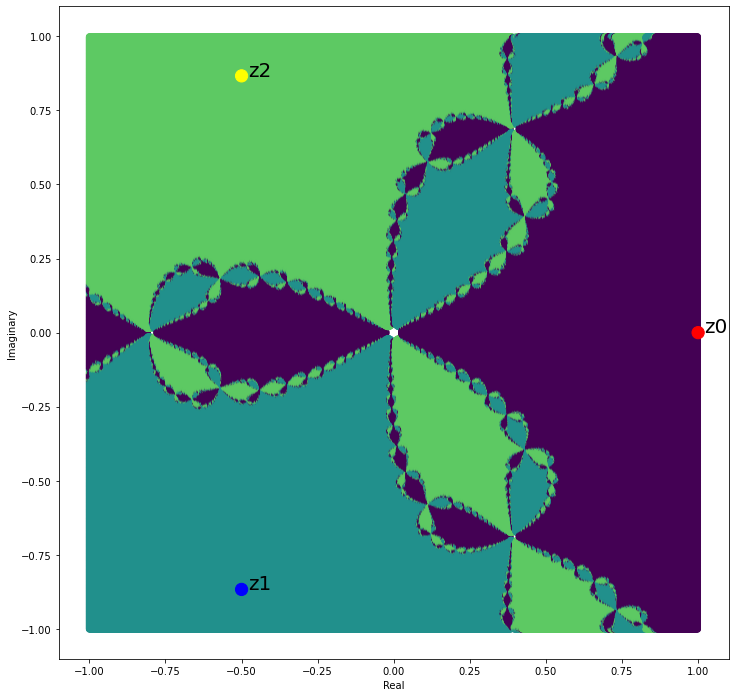

In [14]:
plot_points(df, range_x = range_of_x, range_y = range_of_y)

In [15]:
print("Total Number of points evaluated: ", df.shape[0])
print("total Number of points that converge: ", df[df.converges].shape[0])
print("% of points that converge: ", df[df.converges].shape[0]/df.shape[0])

Total Number of points evaluated:  1000000
total Number of points that converge:  990373
% of points that converge:  0.990373


## Times of execution:

In [59]:
max_iterations=[1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30]
error=1e-4
points_on_X=1000
points_on_y=1000
range_of_x=[-1,1]
range_of_y=[-1,1]
for i in max_iterations:
    print("Iterations: ",i, end = ' ')
    df=generate_points(n_iteration=i, e=error, dimension_x=points_on_X, dimension_y=points_on_y, range_x=range_of_x, range_y=range_of_y)

Iterations:  1 --- 3.4717490673065186 seconds ---
Iterations:  2 --- 4.992631196975708 seconds ---
Iterations:  3 --- 5.677894592285156 seconds ---
Iterations:  4 --- 7.153274059295654 seconds ---
Iterations:  5 --- 8.438056468963623 seconds ---
Iterations:  6 --- 10.512917518615723 seconds ---
Iterations:  7 --- 11.24073338508606 seconds ---
Iterations:  8 --- 11.833204746246338 seconds ---
Iterations:  9 --- 11.851273775100708 seconds ---
Iterations:  10 --- 12.471421718597412 seconds ---
Iterations:  12 --- 13.076879262924194 seconds ---
Iterations:  14 --- 13.103393793106079 seconds ---
Iterations:  16 --- 13.058542966842651 seconds ---
Iterations:  18 --- 12.693711996078491 seconds ---
Iterations:  20 --- 12.519815921783447 seconds ---
Iterations:  25 --- 12.871939897537231 seconds ---
Iterations:  30 --- 12.970703601837158 seconds ---


In [60]:
grid_span=[100,200,300,400,500,600,700,800,900,1000,1500,2000]
iteration=10
for i in grid_span:
    print("Dimensions: ",i, end = ' ')
    df=generate_points(n_iteration=iteration, e=error, dimension_x=i, dimension_y=i, range_x=range_of_x, range_y=range_of_y)

Dimensions:  100 --- 0.1293315887451172 seconds ---
Dimensions:  200 --- 0.4208803176879883 seconds ---
Dimensions:  300 --- 0.9025528430938721 seconds ---
Dimensions:  400 --- 1.6710004806518555 seconds ---
Dimensions:  500 --- 3.27073335647583 seconds ---
Dimensions:  600 --- 4.717536687850952 seconds ---
Dimensions:  700 --- 5.754428148269653 seconds ---
Dimensions:  800 --- 7.895517110824585 seconds ---
Dimensions:  900 --- 9.600504159927368 seconds ---
Dimensions:  1000 --- 11.339685201644897 seconds ---
Dimensions:  1500 --- 25.926889419555664 seconds ---
Dimensions:  2000 --- 47.16484570503235 seconds ---
